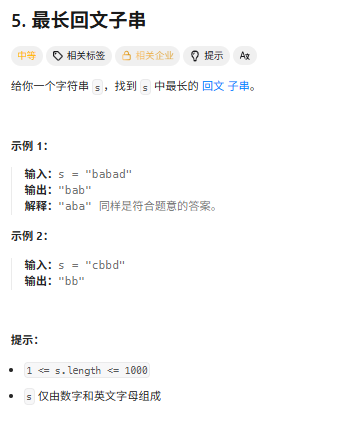

In [7]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        # 定义回文判断函数
        def JudgeCircleString(left: int, right:int) -> str:
            while left >=0 and right < len(s) and s[left]==s[right]:
                left -=1 
                right +=1
            # 注意循环失效是left-1
            return s[left+1:right]
        longest = ''
        for i in range(len(s)):
            # 寻找偶数回文和奇数回文
            res_even = JudgeCircleString(i, i+1)
            res_odd = JudgeCircleString(i, i)
            # 更新当前最长的回文串
            res = max(res_even, res_odd, key=len)
            if len(res) > len(longest): longest = res
        return longest

class BestSolution:
    def longestPalindrome(self, s: str) -> str:
        if not s or len(s) == 1:
            return s
        # 预处理字符串
        t = '#' + '#'.join(s) + '#'
        n = len(t)
        halflen = [0] * n
        boxm = boxr = maxi = 0
        for i in range(n):
            # 利用对称性快速确定初始回文半径
            mirror = 2 * boxm - i
            if i < boxr:
                halflen[i] = min(boxr - i, halflen[mirror])
            # 中心扩展
            a, b = i - halflen[i] - 1, i + halflen[i] + 1
            while a >= 0 and b < n and t[a] == t[b]:
                halflen[i] += 1
                a -= 1
                b += 1
            # 更新最远右边界及其中心
            if i + halflen[i] > boxr:
                boxm = i
                boxr = i + halflen[i]
            # 更新最长回文信息
            if halflen[i] > halflen[maxi]:
                maxi = i
        # 还原原始字符串中的最长回文子串
        start = (maxi - halflen[maxi]) // 2
        end = start + halflen[maxi]
        return s[start:end]
            
if __name__ == '__main__':
    s = Solution()
    bs = BestSolution()
    print(s.longestPalindrome('babad'))
    print(bs.longestPalindrome('babad'))


bab
bab
